In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 10
import re
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF,DCD  # test trajectory
import numpy.linalg
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df1= pd.read_csv('../Outputs/NPT-1.ener',sep="\s+")
df1

,Step,Nr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],Cons,Qty[a.u.],UsedTime[s]
0,0,0.0,71.017893,297.912353,-259.385960,-269.518620,0.000000,NaN,NaN
1,1,0.5,70.889400,297.373337,-259.354010,-269.524747,1.028806,NaN,NaN
2,2,1.0,70.546706,295.935774,-259.217127,-269.522176,0.301171,NaN,NaN
3,3,1.5,70.529239,295.862502,-259.024260,-269.513169,0.330167,NaN,NaN
4,4,2.0,70.413938,295.378827,-258.906199,-269.506991,0.302331,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49996,49996,24998.0,71.370708,299.392371,-265.354888,-269.453425,0.319815,NaN,NaN
49997,49997,24998.5,71.370441,299.391253,-265.409527,-269.455785,0.587757,NaN,NaN
49998,49998,24999.0,71.375137,299.410949,-265.451738,-269.456801,0.319691,NaN,NaN
49999,49999,24999.5,71.543129,300.115658,-265.468389,-269.455838,0.320793,NaN,NaN


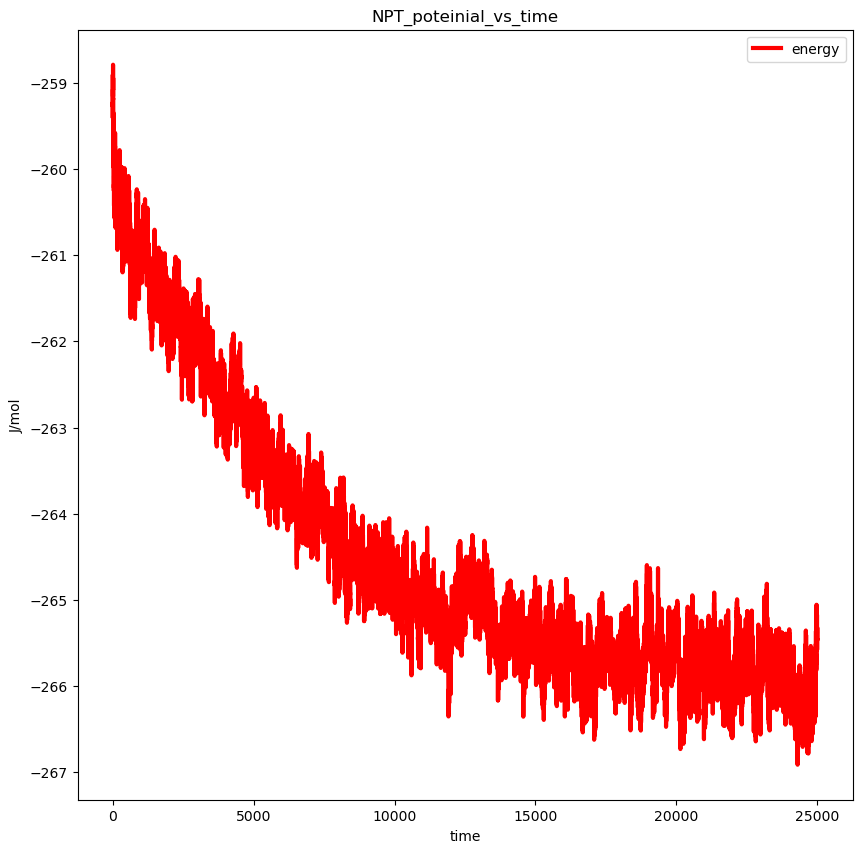

<Figure size 1000x1000 with 0 Axes>

In [11]:
plt.plot(df1["Nr."],df1["Temp[K]"], 'r',linewidth=3,linestyle='-',label='energy')
plt.title('NPT_poteinial_vs_time')
plt.xlabel('time')
plt.ylabel('J/mol')
plt.legend()
plt.show()
plt.savefig("../Figures/NPT_poteinial_vs_time.png")

In [6]:
df2= pd.read_csv('../Outputs/NVT-1.ener',sep="\s+")
df2

,Step,Nr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],Cons,Qty[a.u.],UsedTime[s]
0,0,0.0,71.038787,298.000000,-341.304174,-270.265387,0.000000,NaN,NaN
1,1,0.5,67.808256,284.448272,-337.713187,-270.064937,1.084422,NaN,NaN
2,2,1.0,60.713738,254.687538,-329.900930,-269.669622,0.303056,NaN,NaN
3,3,1.5,55.406526,232.424362,-323.723054,-269.469951,0.284599,NaN,NaN
4,4,2.0,54.454305,228.429898,-322.195686,-269.622588,0.287809,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9996,9996,4998.0,71.329935,299.221332,-259.676576,-269.541126,0.275792,NaN,NaN
9997,9997,4998.5,71.266297,298.954381,-259.608007,-269.535678,0.276409,NaN,NaN
9998,9998,4999.0,71.105412,298.279483,-259.470525,-269.527327,0.526953,NaN,NaN
9999,9999,4999.5,70.945576,297.608991,-259.390264,-269.526101,0.282379,NaN,NaN


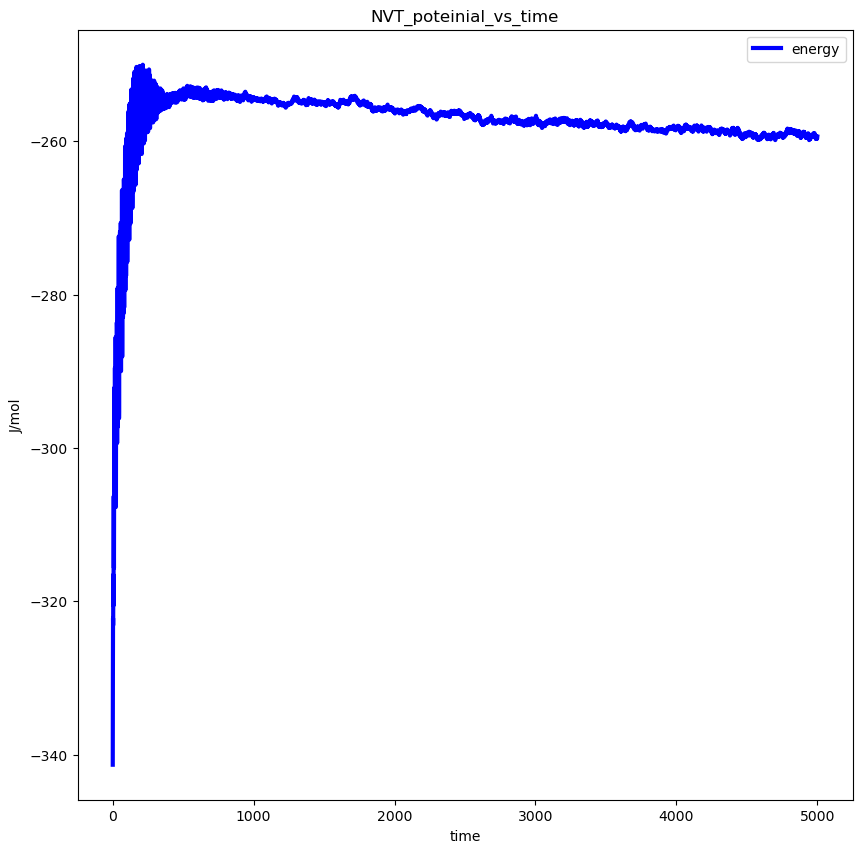

<Figure size 1000x1000 with 0 Axes>

In [12]:
plt.plot(df2["Nr."],df2["Temp[K]"], 'b',linewidth=3,linestyle='-',label='energy')
plt.title('NVT_poteinial_vs_time')
plt.xlabel('time')
plt.ylabel('J/mol')
plt.legend()
plt.show()
plt.savefig("../Figures/NVT_poteinial_vs_time.png")

In [9]:
df3= pd.read_csv('../Outputs/monitor/MONITOR-1.ener',sep="\s+")
df3

,Step,Nr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],Cons,Qty[a.u.],UsedTime[s]
0,0,0.0,71.590273,300.313424,-387.485380,-315.894635,0.000000,NaN,NaN
1,1,0.5,71.661531,300.612342,-387.560885,-315.897022,7.198538,NaN,NaN
2,2,1.0,71.821417,301.283046,-387.729683,-315.904039,0.977943,NaN,NaN
3,3,1.5,71.964089,301.881543,-387.879568,-315.909312,0.901550,NaN,NaN
4,4,2.0,72.007900,302.065323,-387.924410,-315.908356,0.920375,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9996,9996,4998.0,70.868305,297.284847,-386.621851,-315.891932,0.973849,NaN,NaN
9997,9997,4998.5,70.917689,297.492005,-386.675533,-315.895763,0.972833,NaN,NaN
9998,9998,4999.0,70.989183,297.791915,-386.753025,-315.901297,1.045948,NaN,NaN
9999,9999,4999.5,71.007312,297.867965,-386.772015,-315.901695,0.927152,NaN,NaN


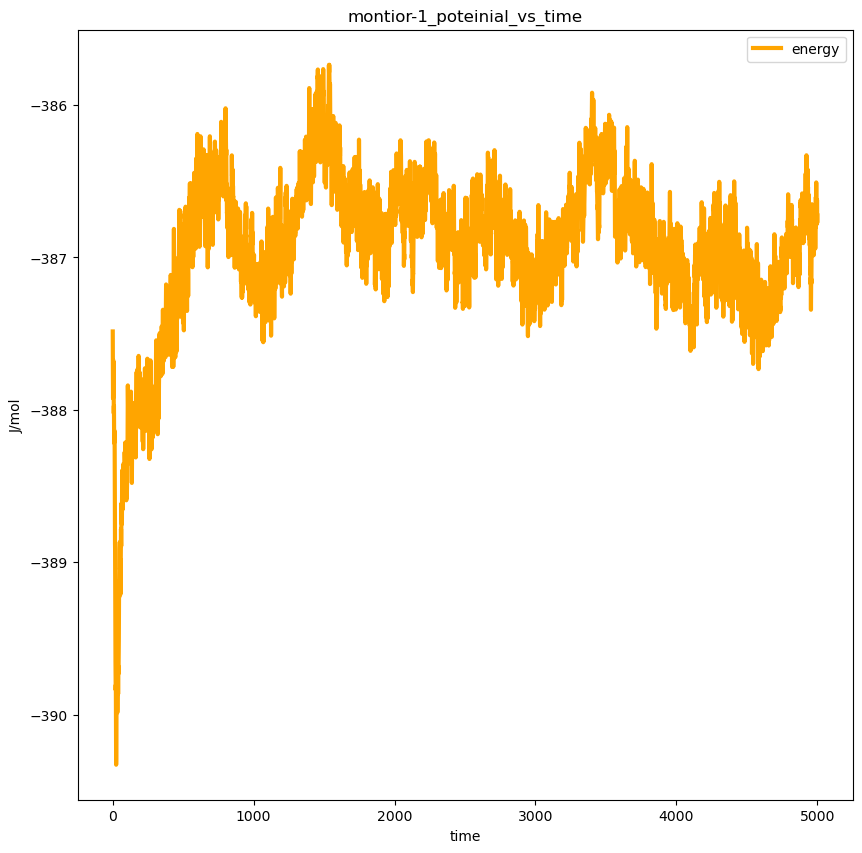

<Figure size 1000x1000 with 0 Axes>

In [13]:
plt.plot(df3["Nr."],df3["Temp[K]"], 'orange',linewidth=3,linestyle='-',label='energy')
plt.title('montior-1_poteinial_vs_time')
plt.xlabel('time')
plt.ylabel('J/mol')
plt.legend()
plt.show()
plt.savefig("../Figures/monitor_1_poteinial_vs_time.png")